In [245]:
import numpy as np
from sklearn.datasets import make_regression

In [246]:
x,y=make_regression(n_features=1,n_samples=100,n_targets=1,n_informative=1,noise=20)

In [247]:
import matplotlib.pyplot as plt

In [248]:
x.shape,y.shape

((100, 1), (100,))

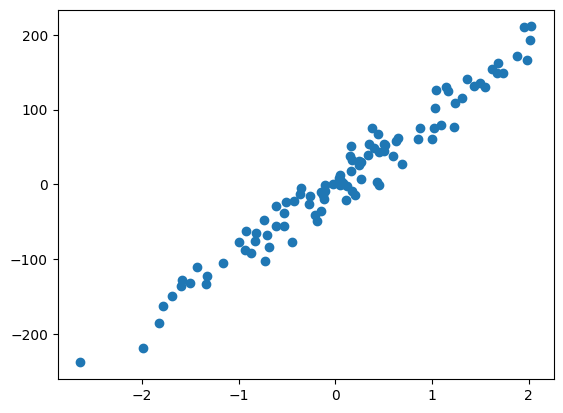

In [249]:
plt.scatter(x,y)

In [250]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [251]:
lr = LinearRegression()

In [252]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [253]:
lr.fit(x_train,y_train)

LinearRegression()

In [254]:
lr.coef_,lr.intercept_

(array([90.88312936]), -1.652640442551407)

In [255]:
y_pred=lr.predict(x_test)

In [256]:
from sklearn.linear_model import Ridge

In [257]:
r1 = Ridge(alpha=20)

In [258]:
r1.fit(x_train,y_train)

Ridge(alpha=20)

In [259]:
y_pred1=r1.predict(x_test)

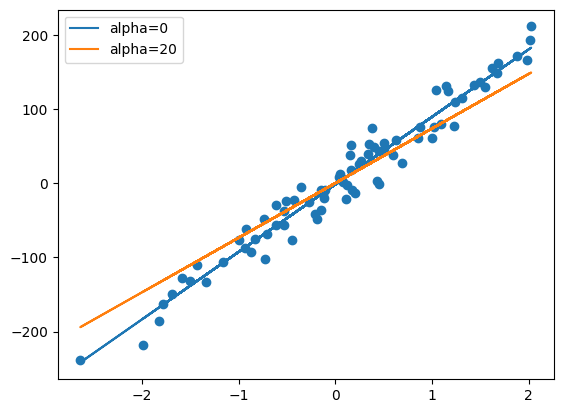

In [260]:
plt.plot(x,lr.predict(x),label='alpha=0')
plt.plot(x,r1.predict(x),label='alpha=20')
plt.scatter(x_train,y_train)
plt.legend()

In [261]:
import numpy as np

class RidgeReg:
    def __init__(self, alpha):
        self.alpha = alpha
        self.m = None
        self.b = None

    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
        
        x_mean = np.mean(X_train)
        y_mean = np.mean(y_train)


        for i in range(X_train.shape[0]):
            num = num + (y_train[i] - y_mean)*(X_train[i] - x_mean)
            den = den + (X_train[i] - x_mean)*(X_train[i] - x_mean)
        
        self.m = num/(den + self.alpha)
        self.b = y_train.mean() - (self.m*X_train.mean())
        print(self.m,self.b) 


   

    def predict(self, x_test):
        return self.m * x_test + self.b


In [262]:
r2 = RidgeReg(alpha=10)

In [263]:
r2.fit(x_train,y_train)

[81.28593038] [-0.70890492]


In [264]:
%%timeit
r2.fit(x_train,y_train)

[81.28593038] [-0.70890492]
[81.28593038] [-0.70890492]
[81.28593038] [-0.70890492]
[81.28593038] [-0.70890492]
[81.28593038] [-0.70890492]
[81.28593038] [-0.70890492]
[81.28593038] [-0.70890492]
[81.28593038] [-0.70890492]
[81.28593038] [-0.70890492]
[81.28593038] [-0.70890492]
[81.28593038] [-0.70890492]
[81.28593038] [-0.70890492]
[81.28593038] [-0.70890492]
[81.28593038] [-0.70890492]
[81.28593038] [-0.70890492]
[81.28593038] [-0.70890492]
[81.28593038] [-0.70890492]
[81.28593038] [-0.70890492]
[81.28593038] [-0.70890492]
[81.28593038] [-0.70890492]
[81.28593038] [-0.70890492]
[81.28593038] [-0.70890492]
[81.28593038] [-0.70890492]
[81.28593038] [-0.70890492]
[81.28593038] [-0.70890492]
[81.28593038] [-0.70890492]
[81.28593038] [-0.70890492]
[81.28593038] [-0.70890492]
[81.28593038] [-0.70890492]
[81.28593038] [-0.70890492]
[81.28593038] [-0.70890492]
[81.28593038] [-0.70890492]
[81.28593038] [-0.70890492]
[81.28593038] [-0.70890492]
[81.28593038] [-0.70890492]
[81.28593038] [-0.70

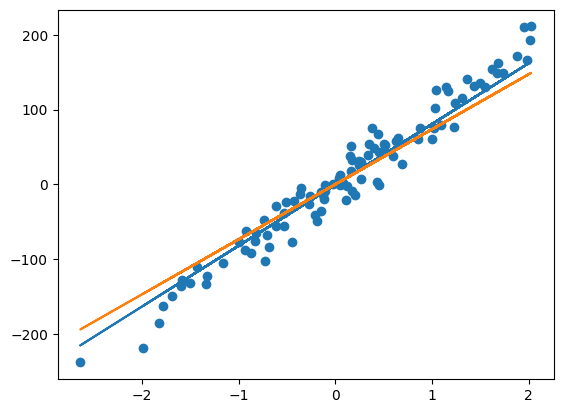

In [265]:
plt.plot(x,r2.predict(x))
plt.plot(x,r1.predict(x),label='alpha=20')
plt.scatter(x,y)

In [266]:
class RidgeReg2:
    
    def __init__(self,alpha=0.1):
        
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        
        X_train = np.insert(X_train,0,1,axis=1)
        I = np.identity(X_train.shape[1])
        I[0][0] = 0
        result = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
        self.intercept_ = result[0]
        self.coef_ = result[1:]
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [267]:
r3 = RidgeReg2(alpha=2)

In [268]:
from sklearn.datasets import load_diabetes

In [269]:
x,y=load_diabetes(return_X_y=True)

In [270]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [271]:
lr.fit(x_train,y_train)

LinearRegression()

In [272]:
y_pred=lr.predict(x_test)

In [273]:
from sklearn.metrics import r2_score

In [274]:
r2_score(y_test,y_pred)

0.42491333619989946

In [275]:
r3.fit(x_train,y_train)

In [276]:
y_pred=r3.predict(x_test)

In [277]:
r2_score(y_test,y_pred)

0.32325506348997424